Unsupervised learning - Clustering

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('ddos_dataset.csv', low_memory=False)
X = pd.read_csv('pca_dataframe.csv', low_memory=False).to_numpy()
y = df['label']
n_y = len(y.unique()) #number of different labels

Hierarchical Clustering

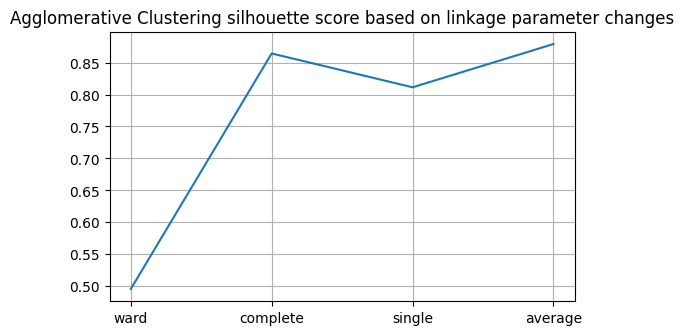

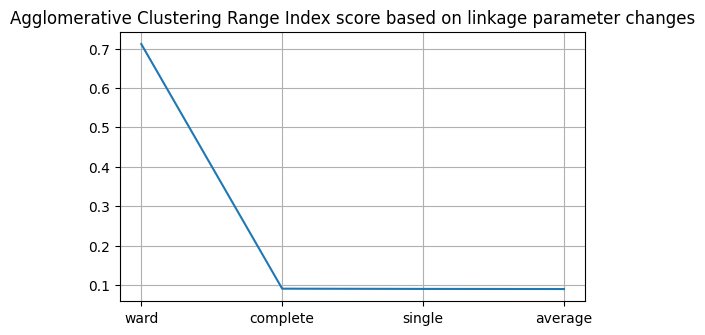

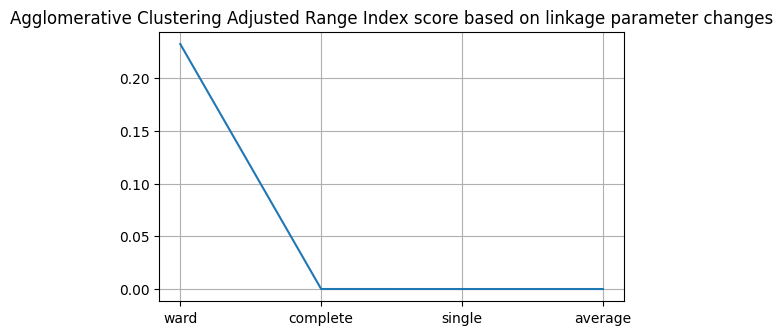

In [4]:
parameters = {'ward', 'complete', 'average', 'single'}
labels = []

for param in parameters:
    aggC = AgglomerativeClustering(n_clusters=n_y, linkage=param)
    labels.append(aggC.fit_predict(X))

plt.figure(figsize=(6, 3.5))
plt.plot([p for p in parameters], [silhouette_score(X, label) for label in labels])
plt.title('Agglomerative Clustering silhouette score based on linkage parameter changes')
plt.grid()
plt.show()

plt.figure(figsize=(6, 3.5))
plt.plot([p for p in parameters], [rand_score(np.ravel(y), label) for label in labels])
plt.title('Agglomerative Clustering Range Index score based on linkage parameter changes')
plt.grid()
plt.show()

plt.figure(figsize=(6, 3.5))
plt.plot([p for p in parameters], [adjusted_rand_score(np.ravel(y), label) for label in labels])
plt.title('Agglomerative Clustering Adjusted Range Index score based on linkage parameter changes')
plt.grid()
plt.show()


With hierarchical clustering the silhouette score reach 0.9 that is the highest one, but at the same time the rand index score and adjusted rand index score have the lowest values (more or less 0, remember that RI and ARI are supervised learning metric for cluster evaluation and they represent "accuracy" in respect of the label of the dataset) in comparison with the other clustering algorithm evaluated in the study. 

KMeans

In [3]:
kmeans = KMeans(n_clusters=n_y, init='random', random_state=None, n_init=1)
result = kmeans.fit(X)
labels = result.labels_
print(f'Silhouette score for KMeans cluster algorithm is {silhouette_score(X, labels)}')
print(f'Range Index scor for KMeans cluster algorithm is {rand_score(np.ravel(y), labels)}')
print(f'Adjusted Range Index score for KMeans cluster algorithm is {adjusted_rand_score(np.ravel(y), labels)}')
print(f'Clustering error: {result.inertia_}')

Silhouette score for KMeans cluster algorithm is 0.35956390495606994
Range Index scor for KMeans cluster algorithm is 0.8564092214400741
Adjusted Range Index score for KMeans cluster algorithm is 0.3434824035262595
Clustering error: 1775302.6331206777


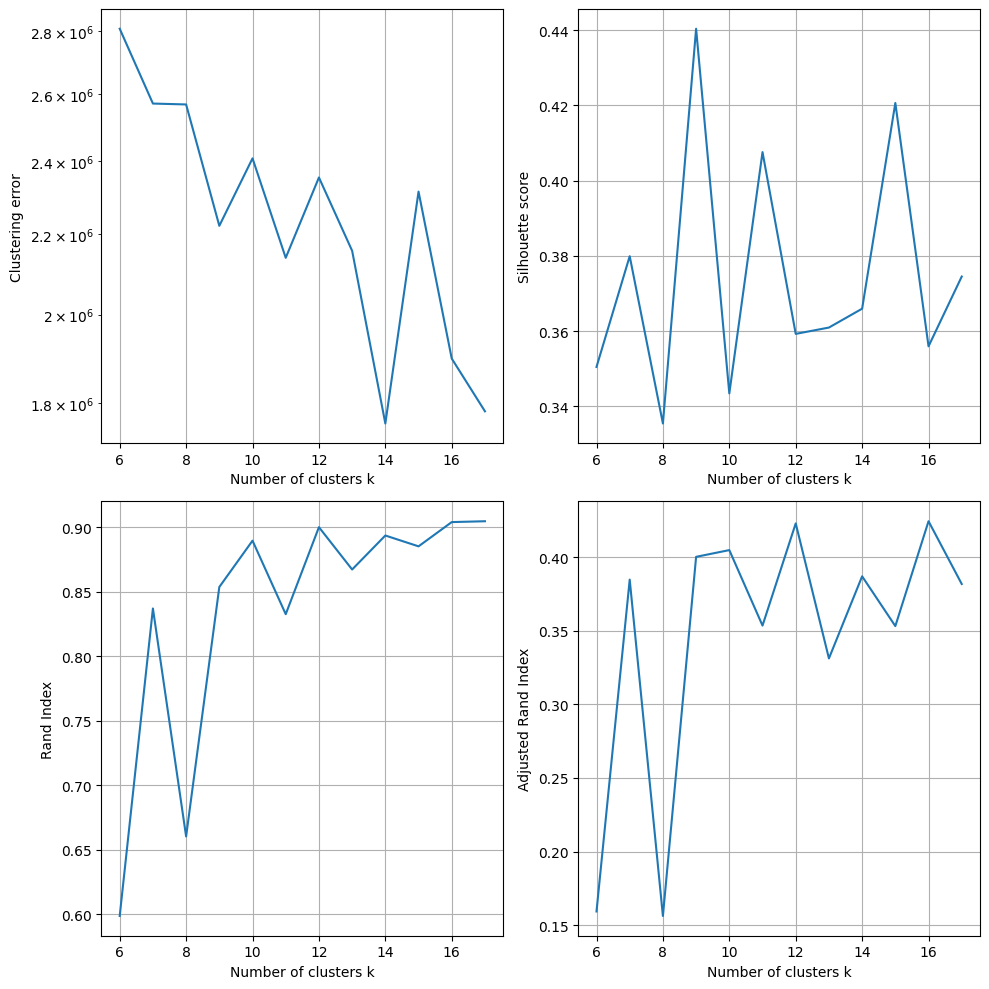

In [6]:
kmeans_results = []
ri_scores = []
ari_scores = []

for k in range (int(0.5*n_y), int(1.5*n_y)):
    results = KMeans(n_clusters=k, init='random', random_state=None, n_init=1).fit(X)
    kmeans_results.append(results)
    ri_scores.append(rand_score(np.ravel(y), results.labels_))
    ari_scores.append(adjusted_rand_score(np.ravel(y), results.labels_))


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot([k for k in range(int(0.5*n_y), int(1.5*n_y))], [result.inertia_ for result in kmeans_results])
axs[0, 0].set_xlabel("Number of clusters k")
axs[0, 0].set_ylabel("Clustering error")
axs[0, 0].set_yscale('log')
axs[0, 0].grid(True)

axs[0, 1].plot([k for k in range(int(0.5*n_y), int(1.5*n_y))], [silhouette_score(X, result.labels_) for result in kmeans_results])
axs[0, 1].set_xlabel("Number of clusters k")
axs[0, 1].set_ylabel("Silhouette score")
axs[0, 1].grid(True)

axs[1, 0].plot([k for k in range(int(0.5*n_y), int(1.5*n_y))], [ri for ri in ri_scores])
axs[1, 0].set_xlabel("Number of clusters k")
axs[1, 0].set_ylabel("Rand Index")
axs[1, 0].grid(True)

axs[1, 1].plot([k for k in range(int(0.5*n_y), int(1.5*n_y))], [ari for ari in ari_scores])
axs[1, 1].set_xlabel("Number of clusters k")
axs[1, 1].set_ylabel("Adjusted Rand Index")
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [3]:
kmeans = KMeans(n_clusters=12, init='random', random_state=None, n_init=1)
result = kmeans.fit(X)
labels = result.labels_
print(f'Silhouette score for KMeans cluster algorithm is {silhouette_score(X, labels)}')
print(f'Range Index scor for KMeans cluster algorithm is {rand_score(np.ravel(y), labels)}')
print(f'Adjusted Range Index score for KMeans cluster algorithm is {adjusted_rand_score(np.ravel(y), labels)}')
print(f'Clustering error: {result.inertia_}')

Silhouette score for KMeans cluster algorithm is 0.38054117513849256
Range Index scor for KMeans cluster algorithm is 0.8861657371816059
Adjusted Range Index score for KMeans cluster algorithm is 0.3892343037598726
Clustering error: 2269803.6732577938


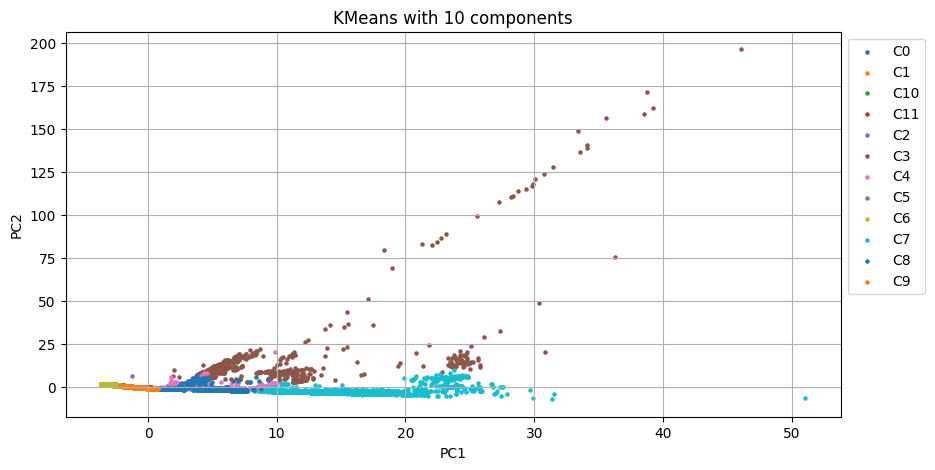

In [4]:
cluster_df = pd.DataFrame(X[:,:3])
cluster_df['cid_KM'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(figsize=(10,5))

for i in np.unique(cluster_df.cid_KM):
    subdf = cluster_df[cluster_df.cid_KM == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('KMeans with 10 components')
ax.grid()

Number of cluster selection: we evaluate the proper number of clusters on the silhouette score in a validation computing the silhouette score for differents number cluster of parameters for each clustering algorithm chosen

Gaussian Mixture

Best number of clusters: 15 with corresponding silhouette score: 0.49919641355115674


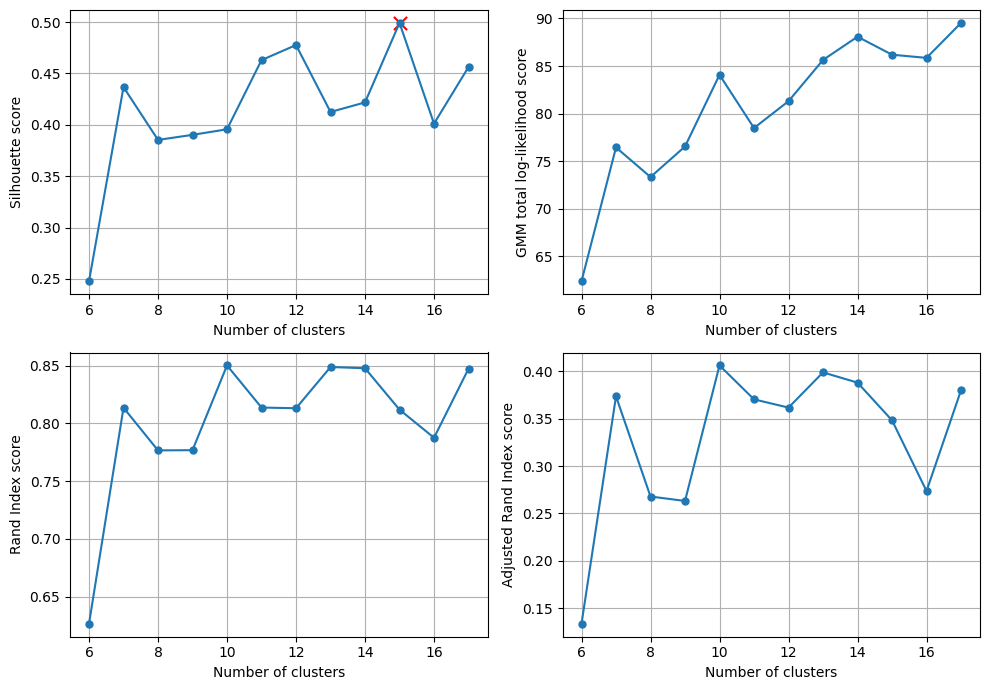

In [9]:
n_cluster = []
sh_scores = []
ri_scores = []
ari_scores = []
log_l_list = []


for n in range(int(n_y / 2), int(1.5 * n_y)):
    gmm = GaussianMixture(n_components=n)
    labels = gmm.fit_predict(X)
    n_cluster.append(n)
    sh_scores.append(silhouette_score(X, labels))
    ri_scores.append(rand_score(np.ravel(y), labels))
    ari_scores.append(adjusted_rand_score(np.ravel(y), labels))
    log_l_list.append(gmm.score(X))

best_sh = np.max(sh_scores)
best_n = n_cluster[np.argmax(sh_scores)]
print(f'Best number of clusters: {best_n} with corresponding silhouette score: {best_sh}')

fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].plot(n_cluster, sh_scores, marker='o', markersize=5)
ax[0, 0].scatter(best_n, best_sh, color='r', marker='x', s=90)
ax[0, 0].grid()
ax[0, 0].set_xlabel('Number of clusters')
ax[0, 0].set_ylabel('Silhouette score') 

ax[0, 1].plot(n_cluster, log_l_list, marker='o', markersize=5)
ax[0, 1].grid()
ax[0, 1].set_xlabel('Number of clusters')
ax[0, 1].set_ylabel('GMM total log-likelihood score')

ax[1, 0].plot(n_cluster, ri_scores, marker='o', markersize=5)
ax[1, 0].grid()
ax[1, 0].set_xlabel('Number of clusters')
ax[1, 0].set_ylabel('Rand Index score')

ax[1, 1].plot(n_cluster, ari_scores, marker='o', markersize=5)
ax[1, 1].grid()
ax[1, 1].set_xlabel('Number of clusters')
ax[1, 1].set_ylabel('Adjusted Rand Index score')

plt.tight_layout()
plt.show()

In [5]:
best_n = 15

In [6]:
pca_result =pd.read_csv('pca_dataframe.csv').to_numpy()
gmm = GaussianMixture(n_components=best_n)
labels = gmm.fit_predict(X)

In [7]:
print(f'Silhouette score for GMM cluster algorithm is {silhouette_score(X, labels)}')
print(f'Rand Index score for GMM cluster algorithm is {rand_score(np.ravel(y), labels)}')
print(f'Adjusted Rand Index GMM for KMeans cluster algorithm is {adjusted_rand_score(np.ravel(y), labels)}')

Silhouette score for GMM cluster algorithm is 0.4430129445074091
Rand Index score for GMM cluster algorithm is 0.8476278540294424
Adjusted Rand Index GMM for KMeans cluster algorithm is 0.3850828614837672


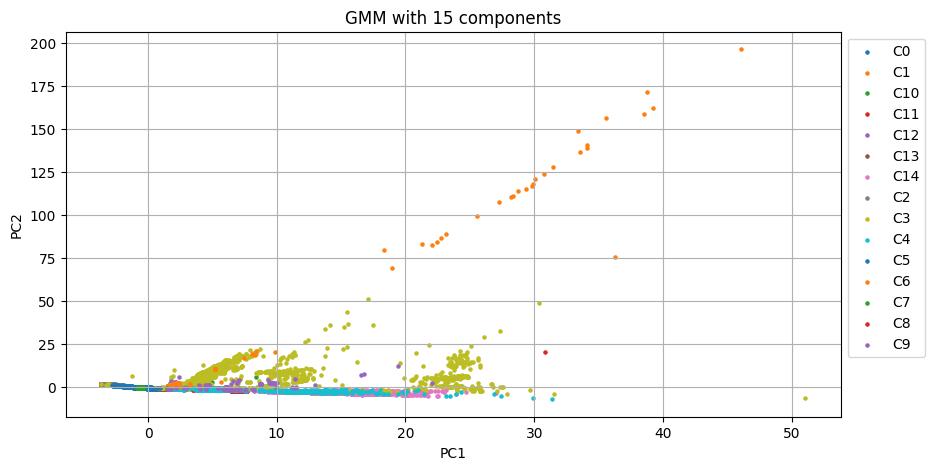

In [8]:
cluster_df['cid_gmm'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(figsize=(10,5))

for i in np.unique(cluster_df.cid_gmm):
    subdf = cluster_df[cluster_df.cid_gmm == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title(f'GMM with {best_n} components')
ax.grid()

DBSCAN

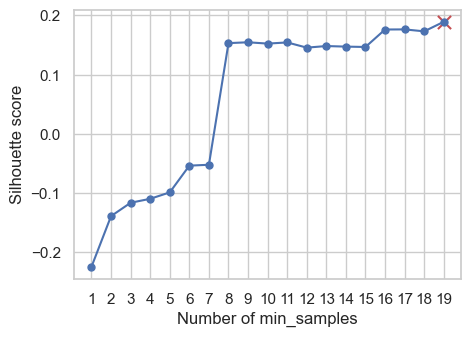

In [53]:
sh_scores = []
n_samples = []

for min in range(1, 20):
    
    dbscan = DBSCAN(min_samples=min)
    labels = dbscan.fit_predict(X)
    sh_scores.append(silhouette_score(pca_result, labels))
    n_samples.append(min)

best_sh = np.max(sh_scores)
best_n = n_samples[np.argmax(sh_scores)]

plt.figure(figsize=(5, 3.5))
plt.plot(n_samples, sh_scores, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.xlabel('Number of min_samples')
plt.ylabel('Silhouette score') 
plt.xticks(np.arange(1, best_n + 1))
plt.grid(True)
plt.show()


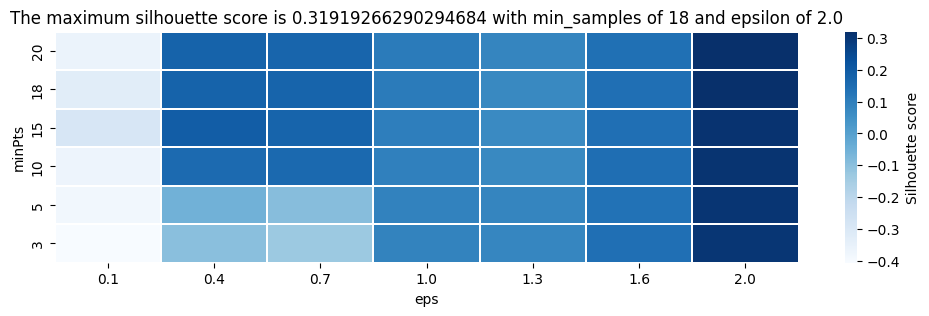

In [9]:
sh_scores =[]
ri_scores = []
ari_scores = []

mins = [3, 5, 10, 15, 18, 20]
epsilon = [0.1, 0.4, 0.7, 1, 1.3, 1.6, 2]

labels = []
for eps in epsilon:
    for min in mins:
        dbscan = DBSCAN(eps=eps, min_samples=min)
        labels = dbscan.fit_predict(X)
        sh_scores.append((eps, min, silhouette_score(X, labels)))
        ri_scores.append((eps, mins, rand_score(np.ravel(y), labels)))
        ari_scores.append((eps, mins, adjusted_rand_score(np.ravel(y), labels)))

gs = pd.DataFrame(sh_scores, columns=['eps', 'minPts', 'sh'])
gs = pd.pivot_table(gs, columns='eps', index='minPts', values='sh', aggfunc=lambda x:x)

plt.figure(figsize=(12,3))
max_ss = gs.max().max()
mins_max_ss = gs.stack().idxmax()[0]
eps_max_ss = gs.stack().idxmax()[1]
plt.title(f'The maximum silhouette score is {max_ss} with min_samples of {mins_max_ss} and epsilon of {eps_max_ss}')
sns.heatmap(gs, cmap='Blues', cbar_kws={'label':'Silhouette score'}, linewidths=.005)
plt.gca().invert_yaxis()
plt.show()

In [14]:
eps_max_ss = 2
mins_max_ss = 18

Text(0.5, 1.0, 'DBSCAN with eps = 2 and min_samples = 18')

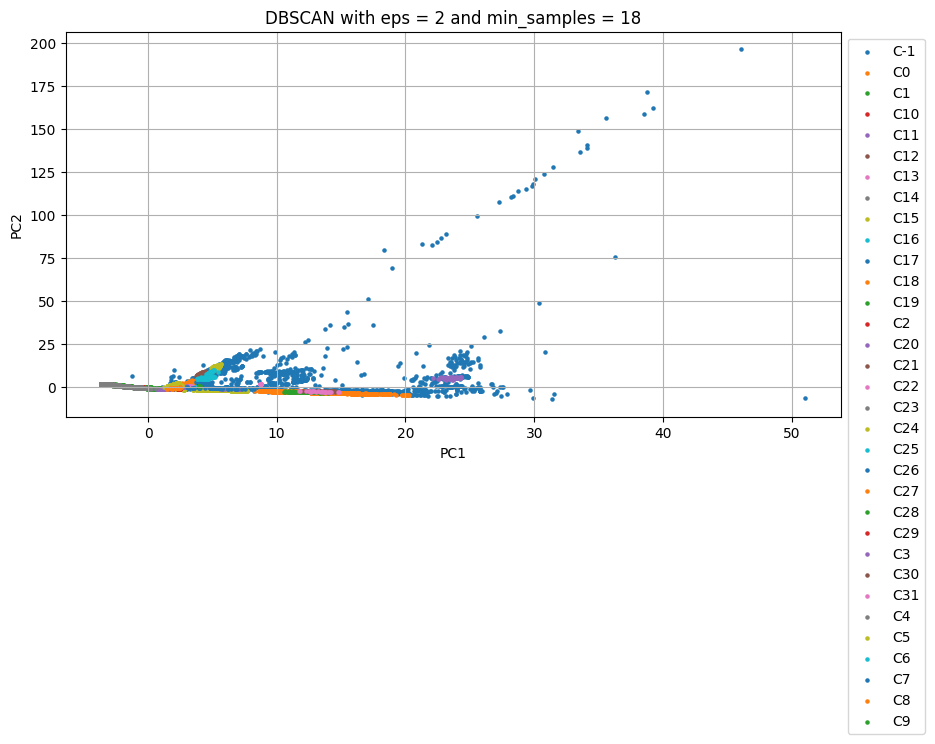

In [19]:
n_samples, n_features = df.shape
labels = []
dbscan = DBSCAN(eps=eps_max_ss, min_samples=mins_max_ss)
labels = dbscan.fit_predict(X)


cluster_df['cid_dbscan'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(figsize=(10,5))

for i in np.unique(cluster_df.cid_dbscan):
    subdf = cluster_df[cluster_df.cid_dbscan == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title(f'DBSCAN with eps = {eps_max_ss} and min_samples = {mins_max_ss}')



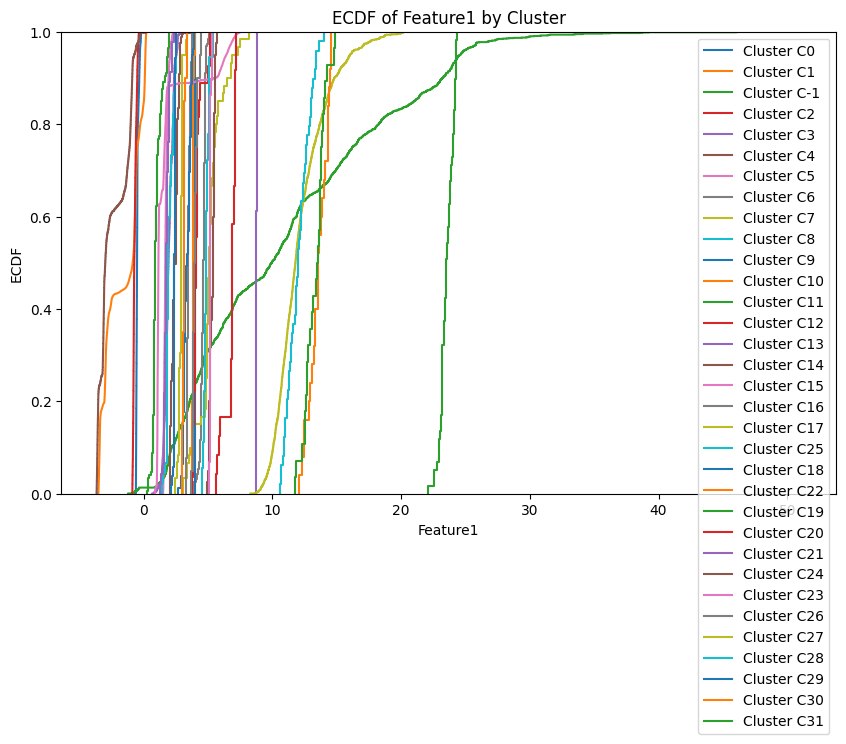

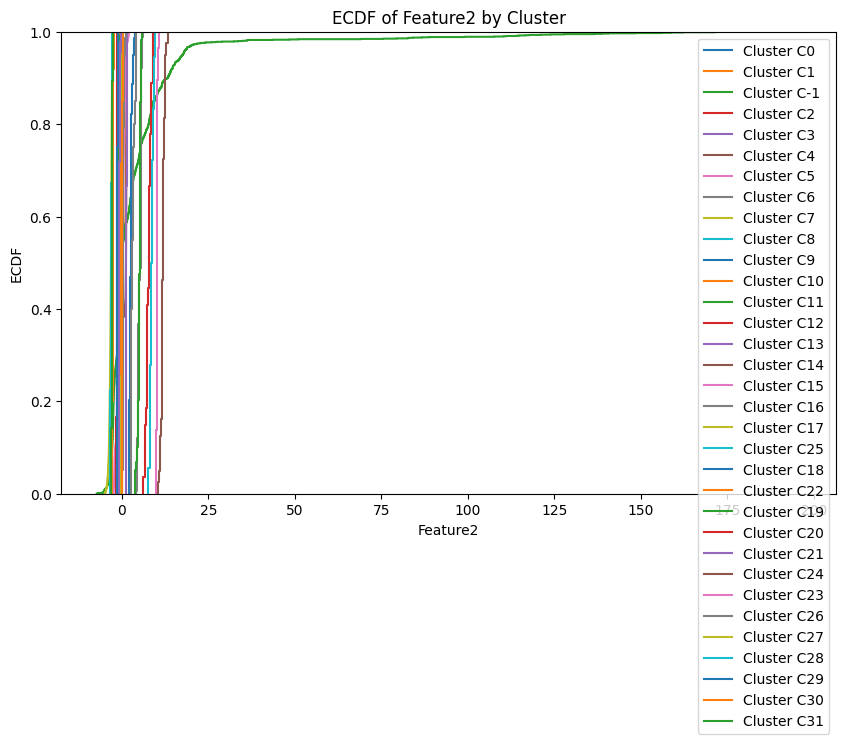

In [20]:
data = pd.DataFrame({
    'Feature1': cluster_df[0],
    'Feature2': cluster_df[1],
    'Cluster': cluster_df['cid_dbscan']
})

# Plot ECDFs for each feature within each cluster
for feature in ['Feature1', 'Feature2']:
    plt.figure(figsize=(10, 6))
    for cluster in data['Cluster'].unique():
        subset = data[data['Cluster'] == cluster]
        ecdf = sns.ecdfplot(subset[feature], label=f'Cluster {cluster}')

    plt.title(f'ECDF of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('ECDF')
    plt.legend()
    plt.show()

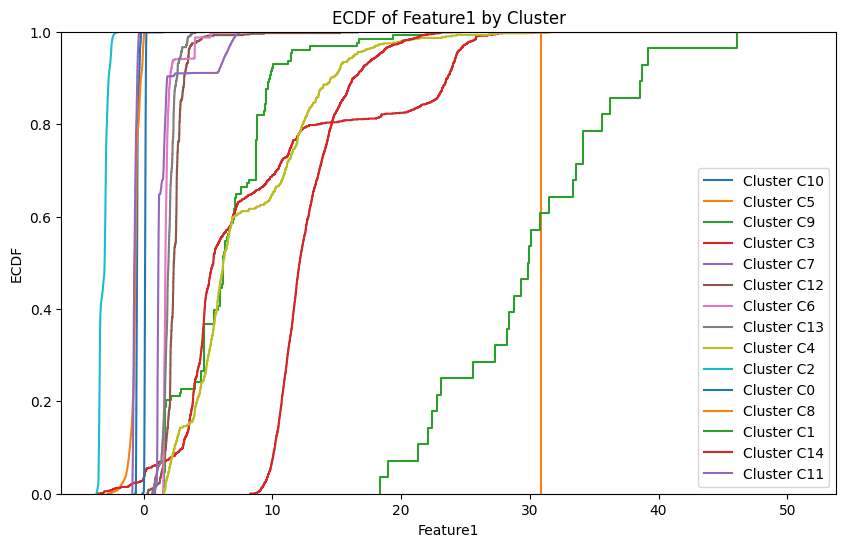

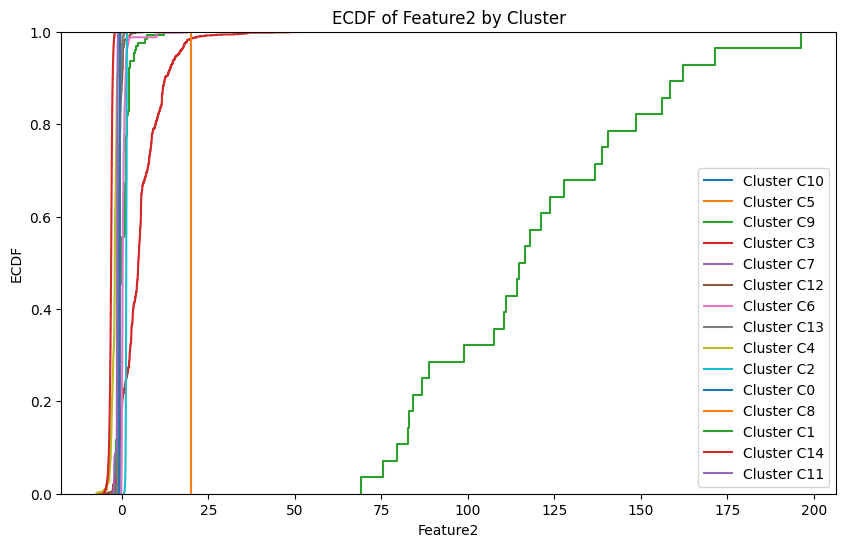

In [21]:
data = pd.DataFrame({
    'Feature1': cluster_df[0],
    'Feature2': cluster_df[1],
    'Cluster': cluster_df['cid_gmm']
})

# Plot ECDFs for each feature within each cluster
for feature in ['Feature1', 'Feature2']:
    plt.figure(figsize=(10, 6))
    for cluster in data['Cluster'].unique():
        subset = data[data['Cluster'] == cluster]
        ecdf = sns.ecdfplot(subset[feature], label=f'Cluster {cluster}')

    plt.title(f'ECDF of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('ECDF')
    plt.legend()
    plt.show()

In [22]:
cluster_df[2] = X[:,2]


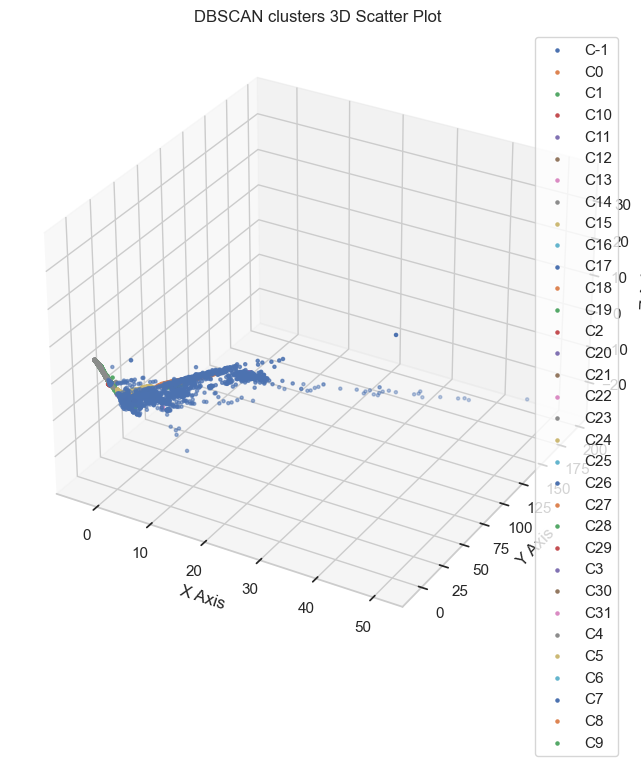

In [23]:
sns.set(style="whitegrid")
# Create a 3D scatter plot with color-coded clusters using Seaborn
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(cluster_df.cid_dbscan):
    subdf = cluster_df[cluster_df.cid_dbscan == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('DBSCAN clusters 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()